# LSTM Time Series Basic Example

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import matplotlib.pyplot as plt

## Generate the time series training data

#### Create x, y data

In [4]:
x = np.linspace(1, 1000, 1000)

y1 = 1.5 * np.sin(x)
y2 = 0.5 * np.sin(400*x)
y3 = 15 - 0.04*x + 0.02*x**1.1

y = y1 + y2 + y3
training = y[:900]
testing = y[900:]

#### Plot x, y data

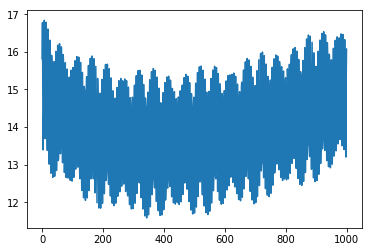

In [5]:
plt.plot(y)

#### Package x, y data into sequences

In [7]:
k = 10
inputs = []
target = []
for i in range(0, len(training)-k):
    inputs.append(training[i:i+k].reshape(k, 1))
    target.append([training[i+k]])
inputs = torch.tensor(inputs, dtype=torch.float)
target = torch.tensor(target, dtype=torch.float)
print(inputs[1])
print(target[0])
print(inputs.shape)
print(target.shape)

tensor([[16.7738],
        [15.1145],
        [13.3961],
        [13.9441],
        [14.3965],
        [15.5029],
        [16.8404],
        [15.3514],
        [13.6940],
        [13.8297]])
tensor([13.8297])
torch.Size([890, 10, 1])
torch.Size([890, 1])


## Build our LSTM network architecture

In [8]:
class LSTM(nn.Module):
    def __init__(self, hidden_size, layer_dim=1):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm1 = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=layer_dim, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 40)
        self.fc2 = nn.Linear(40, 1)
        
    def forward(self, inputs):
        out, (hn, cn) = self.lstm1(inputs)
        out = F.relu(self.fc1(hn.view(-1, self.hidden_size)))
        out = self.fc2(out)
        return out
    
net = LSTM(hidden_size=30, layer_dim=1)

#### Define our loss criterion and step optimizer

In [9]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

## Training Loop

In [10]:
for epoch in range(3000):  # loop over the dataset multiple times
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, target)
    if epoch%100 == 0:
        print(loss)
    #print(loss)
    loss.backward()
    optimizer.step()

print('Finished Training')

tensor(189.7171, grad_fn=<MseLossBackward>)
tensor(1.3533, grad_fn=<MseLossBackward>)
tensor(1.3450, grad_fn=<MseLossBackward>)
tensor(1.2828, grad_fn=<MseLossBackward>)
tensor(0.5212, grad_fn=<MseLossBackward>)
tensor(0.3744, grad_fn=<MseLossBackward>)
tensor(0.3174, grad_fn=<MseLossBackward>)
tensor(0.2682, grad_fn=<MseLossBackward>)
tensor(0.2244, grad_fn=<MseLossBackward>)
tensor(0.0597, grad_fn=<MseLossBackward>)
tensor(0.0844, grad_fn=<MseLossBackward>)
tensor(0.0228, grad_fn=<MseLossBackward>)
tensor(0.0217, grad_fn=<MseLossBackward>)
tensor(0.0164, grad_fn=<MseLossBackward>)
tensor(0.0136, grad_fn=<MseLossBackward>)
tensor(0.0104, grad_fn=<MseLossBackward>)
tensor(0.0116, grad_fn=<MseLossBackward>)
tensor(0.0086, grad_fn=<MseLossBackward>)
tensor(0.0074, grad_fn=<MseLossBackward>)
tensor(0.0083, grad_fn=<MseLossBackward>)
tensor(0.0065, grad_fn=<MseLossBackward>)
tensor(0.0240, grad_fn=<MseLossBackward>)
tensor(0.0056, grad_fn=<MseLossBackward>)
tensor(0.0125, grad_fn=<MseLossB

## Evaluate our trained Model

#### prediction function to make predictions on our testing data

In [11]:
def pred(testing, look_ahead):
    result = np.array([])
    for i in range(look_ahead):
        if i < len(testing):
            test_ar = np.concatenate((testing[i:], result))
        else:
            test_ar = result[-10:]
        tensor_input = torch.from_numpy(test_ar)
        tensor_input = tensor_input.float()
        prediction = net(tensor_input.view(1, len(testing), 1))
        result = np.append(result, prediction.item())
    return result

In [12]:
pred(testing[20:30], 3)

array([16.3096962 , 15.49162197, 14.1918354 ])

#### analyze function to plot the ground truth data against our model's predictions

In [13]:
def analyze(testing, ground_truth):
    plt.plot(np.linspace(1, len(testing)+len(ground_truth), len(testing)+len(ground_truth)), np.concatenate((testing, ground_truth)), 'r')
    plt.plot(np.linspace(len(testing)+1, len(testing)+len(ground_truth), len(ground_truth)), pred(testing, len(ground_truth)), 'b')

#### Ground Truth (RED) vs Prediction (Blue)

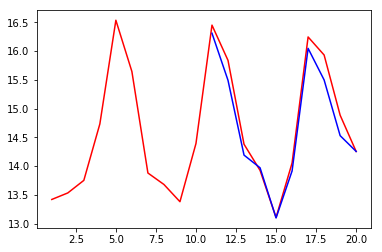

In [15]:
analyze(testing[20:30], testing[30:40])